<a href="https://colab.research.google.com/github/Explorer9/BERTopic/blob/main/Linear_reg%20and%20cnn_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression

In [65]:
import torch
import sklearn
from sklearn.model_selection import train_test_split
import torch.nn
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [48]:
np.random.seed(4)
a=np.random.rand(1000).reshape(-1,1).astype('float32')
b=np.random.rand(1000).reshape(-1,1).astype('float32')

In [51]:
a=np.append(a,b,axis=1)

In [53]:
at=torch.from_numpy(a)
bt=torch.from_numpy(b)
at.shape

torch.Size([1000, 3])

In [54]:
at.requires_grad=True
bt.requires_grad=True

In [55]:
x_train, x_test, y_train, y_test=train_test_split(at,bt,test_size=0.33)

In [56]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [57]:
inputDim = 3       # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 10000

In [58]:
model=linearRegression(inputDim,outputDim)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:

for i in range(epochs):
  
 
  output=model(x_train)
  loss=criterion(y_train,output)
  optimizer.zero_grad()
  loss.backward(retain_graph=True)
  if i%100==0:
    print(loss)
  optimizer.step()




In [60]:
for name, param in model.named_parameters():
  print(name, param.data)

linear.weight tensor([[-1.8259e-07,  8.1540e-02,  9.1846e-01]])
linear.bias tensor([1.2020e-06])


In [ ]:
for i in range(len(x_test)):
  print(model(x_test[i]).data,y_test[i])

Convolution example


In [71]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [77]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [78]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [79]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.187
[1,  4000] loss: 1.840
[1,  6000] loss: 1.691
[1,  8000] loss: 1.583
[1, 10000] loss: 1.519
[1, 12000] loss: 1.443
[2,  2000] loss: 1.398
[2,  4000] loss: 1.354
[2,  6000] loss: 1.355
[2,  8000] loss: 1.330
[2, 10000] loss: 1.297
[2, 12000] loss: 1.296
Finished Training


In [120]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = net(images)

In [121]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    cat plane   car plane


In [122]:
x=images[:2][0]
x=x.numpy()

In [115]:
import matplotlib.pyplot as plt


In [119]:
x.shape

(32, 32, 3)

In [116]:
x=x.reshape([32,32,3])

In [118]:
type(x)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


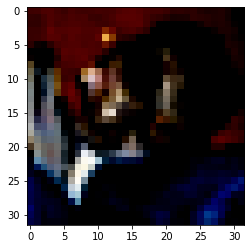

In [123]:
plt.imshow(np.transpose(x, (1, 2, 0)))
